Sometimes we don't have enough data to train a model or want to take a simple curve fitting aproach to approximating a series of points.

In this case we can use scipy.optimize.curve_fit to easily approximate a curve for us

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit

# Simple 2D example

In [2]:
# simple example (2D curve)
import numpy as np 
from scipy.optimize import curve_fit 
# create a data set 
x_values = np.array([1,2,3,4,5]) 
y_values = np.array([2,8,18,32,50]) 
#define the function we are going to curve fit to 
def curve_function(x, a): 
  return a*(x**2) 

# perform our curve fit 
parameter, covariance = curve_fit(curve_function, x_values, y_values)
print(parameter[0], covariance[0][0])

2.0 0.0


# 3D curve example

In [3]:
# 3D curve example
import numpy as np 
from scipy.optimize import curve_fit 
# create a data set 
x_values = np.array([1,2,3,4,5])
y_values = np.array([5,4,3,2,1]) 
z_values = np.array([13,20,33,52,77])
#define the function we are going to curve fit to 
def curve_function(variables, a, b):
  # unpack our_variables
  x,y = variables
  return a*(x**2)+b*(y) 

# perform our curve fit 
parameters, covariance = curve_fit(curve_function, (x_values, y_values), z_values)
print(parameters)

[3. 2.]


# 2D example with randomly selected points with some noise added

In [4]:
# create a numpy rand object
rand = np.random.RandomState()

# lets create some pseudo data to perform our curve fitting one
x_values = rand.uniform(0,10, 10)
x_values.sort()

# create a random parameter - this is the value the curve fit will need to try to retrieve
a = random.random()*10

# lets add some noisy variance to our answers so that our data does not lie precisely on the curve
variances = rand.normal(-5,5, 10)

# now generate our dependent Y values
y_values = np.empty(0)
for x, variance in zip(x_values, variances):
  y_value = (a*(x**2) + variance)
  y_values = np.append(y_values, y_value)

In [5]:
#define the function we are going to curve fit to
def func(x, a):
  return a*(x**2)

# perform our curve fit 
value, error = curve_fit(func, x_values, y_values)
    # [0.58083612, 1.5599452,  1.5601864,  3.74540119, 5.98658484, 6.01115012, 7.08072578, 7.31993942, 8.66176146, 9.50714306]
    # ), 
    # np.array([0.58083612, 1.5599452,  1.5601864,  3.74540119, 5.98658484, 6.01115012, 7.08072578, 7.31993942, 8.66176146, 9.50714306]))

# retrieve our parameter
A = value[0]
std_dev = np.sqrt(np.diag(error))[0]

print(f"True value of A = {a}")
print(f"Estimated value of A = {A}")
print(f"Standard deviation = {std_dev}")

True value of A = 7.153163587128893
Estimated value of A = 7.065105927019458
Standard deviation = 0.053205833587394134


In [6]:
# use the same input values with our derived value of A to recreate our curve
predicted_x = func(x_values, A)

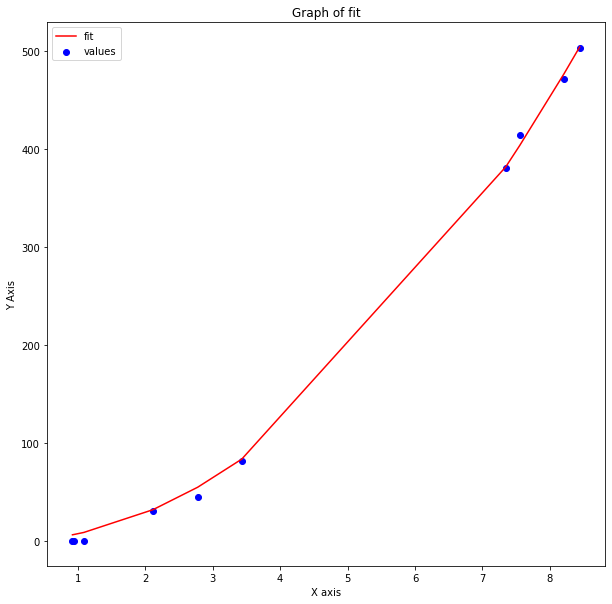

In [7]:
# plot our estimated curve against the dataset curve_fit was given
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Graph of fit")
plt.xlabel("X axis")
plt.ylabel("Y Axis")
ax.scatter(x_values, y_values, color ="blue", label = "values")
ax.plot(x_values, predicted_x, color ="red", label = "fit")
ax.legend()
plt.show()

# 3D example including some random noise in the input variables

In [8]:
# select some independent variable values
x_values = rand.uniform(0,10, 10)
y_values = rand.uniform(0,10, 10)

# create random parameters - these are the values the curve fit will need to try to retrieve
a = random.random()*10
b = random.random()*10

z_values = []
for x,y,variance in zip(x_values, y_values, variances):
  z_value = (a*(x**2) + b*y)
  z_values.append(z_value)

In [9]:
# convert our lists to numpy arrays where needed
x_array = x_values
y_array = np.array(y_values)
z_array = np.array(z_values)

In [10]:
#define the function we are going to curve fit to
def func(independent, a, b):
  x,y = independent
  return a*(x**2)+b*y

# perform our curve fit (note we have to pack the multiple variables as a tuple)
params, error = curve_fit(func, (x_array, y_array), z_array)
# retrieve our parameter
A, B = params[0], params [1]
std_dev = np.sqrt(np.diag(error))
print(f"True A value = {a}", f"True B value = {b}")
print(f"Estimated A = {A}", f"Estimated B= {B}", f"Standard Deviations = {std_dev}")

True A value = 7.322044626708447 True B value = 0.021818990586761622
Estimated A = 7.322044626708447 Estimated B= 0.021818990586759353 Standard Deviations = [1.36868415e-16 1.15541537e-15]
